# Кейс

Вы пришли на позицию Senior продуктового аналитика в стартап. Кроме вас в команде еще 2 middle и 1 junior аналитик. Стартап – мобильное приложении с ежедневными мотивирующими цитатами. Приложение имеет бесплатный доступ, полноценно работает по подписке, а также у него есть внутренние разовые покупки. После онбординга, в качестве одной из первых задач, вас попросили подвести итоги по АБ эксперименту. Вы решаете провести эксперимент как будто бы “с нуля”, чтобы перепроверить все важные аспекты. В этом вам поможет чек-лист АБ экспериментов.

**В рамках задания необходимо** провести полный цикл АБ-эксперимента на основе данных результата АБ-теста – paymentChange. Его проводили на новых пользователях сплитом 50/50. Эксперимент заключался в снижении стоимости подписки с 400 до 160 у.е.

**В частности:**    
1. Сформировать бизнес требования к эксперименту;
2. Задизайнить АБ-тест. За основу предлагается взять данные только контрольной группы, не подсматривая данные тестовой группы;
3. Проанализировать и интерпретировать результаты;
4. Дать рекомендации по дальнейшим шагам;
5. Результаты представить в формате Google Slides. К презентации приложить Google Colab с исходным кодом анализа.

## 1. Бизнес-аспекты эксперимента

1. Проблематика: у нас слишком высокая стоимость подписки, что снижает вовлеченность пользователей. Снизив ее мы охватим бОльшую долю пользователей готовых платить. Так как планируем значительно снизить стоимость подписки (в 2.5 раза), то также ожидаем, что пользователи с подпиской чаще будут осуществлять разовые покупки, так как более полноценно пользуются нашим продуктом. В совокупности это позволит увеличить ARPU.
2. Гипотеза: Если снизить стоимость подписки с 400 до 160 для новых пользователей, то ARPU увеличится на 4,8%, потому что большее количество пользователей смогут позволить себе подписку и будут вовлечены в продукт для осуществления разовых покупок.
3. Масштаб и направление изменения метрики: ARPU увеличится на 4,8%
4. Экономическая целесообразность: Возможно рассчитать экономическую целесообразность, используя данные о затратах на реализацию, проведение эксперимента и ожидаемый эффект от изменения.
5. Понимание, что нужен АБ: АБ явно нужен, учитывая тот факт, что вводится изменение связанное напрямую со стоимостью подписки, есть риски снизить выручку.
6. Возможен сетевой эффект, если пользователи из контроля узнаю о том, что некоторым предлагается подписка в 2,5 раза дешевле, то они могут не оформить ее за 400 и постараться найти способ оформить дешевле. Тут еще зависит от того насколько быстро развивается наш стартап, т.к. если он мало известен, то возможно эффект будет незначителен.
7. Критерий успеха: увеличение ARPU на 4,8%
8. Action plan:
- В случае успеха: вводим новую стоимость подписки на всех пользователей, если ввести только для новых, то старые начнуть заводить новые аккаунты для снижения стоимости.
- В случае неудачи / отсутствии эффекта: пересматриваем ценовую политику на меньшее снижение стоимости, возможно кол-во желающих оформить подписку особо не снизиться при этом общая выручка вырастет.

## 2. Дизайн эксперимента:
1. Способ формирования выборки: по пользователям на слой с оплатой.
2. Вероятность пересечения с другими экспериментами: если в текущий момент у нас проводится всего 2 эксперимента actionChange и paymentChange, то необходим поделить пользователей, чтобы исключить влияние actionChange на наш эксперимент.
4. Сегмент: все новые пользователи.
5. Ключевая метрика: ARPU.
6. Заградительные метрики: Конверсия в разовую покупку (можно взять в подписку, однако, снижая стоимость подписки, больше пользователей смогут себе позволить ее, при этом стоимость разовой покупки не меняется, если она просядет, есть вероятность, что ARPU значительно упадет).
7. Информационные метрики: Конверсии в фичи, две из которые имеют слабую корреляцию в разовую покупку.
8. Статистический критерий для основной метрики ARPU - t-тест (метрика непрерывная), для заградительной - Конверсия в разовую покупку - хи-квадрат.
9. Разделение: 50/50.
10. alpha = 0.05, beta = 0.2. MDE: APRU = 4,8% (размер групп по 10977 пользователей), CR в покупку = 2% (абс.) (размер групп по 9059 пользователей).
11. Длительность эксперимента: 2248 в среднем новых пользователей в сутки, чтобы набрать выборку в 10977 потребуется 5 дней, для сохранения сезонности возьмем 7 дней, исходя из длительности ожидаем 17501 пользователя.
13. Action plan:
- В случае успеха: вводим новую стоимость подписки на всех пользователей, если ввести только для новых, то старые начнуть заводить новые аккаунты для снижения стоимости.
- При просадке CR в разовую покупку: остановка эксперимента, пересмотр снижения CR в разовую покупку + тоже что "При отсутствии эффекта"
- При отсутствии эффекта: пересматриваем ценовую политику на меньшее снижение стоимости, возможно кол-во желающих оформить подписку особо не снизиться при этом общая выручка вырастет.

In [1]:
import uuid
import hashlib
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from datetime import datetime, timedelta

import scipy.stats as stats
from sklearn import preprocessing

# ttest_ind, mannwhitneyu, chi2_contingency, normaltest, shapiro, kstest, bernoulli, expon, norm, probplot
from scipy.stats import ttest_ind, kstest, bernoulli, mannwhitneyu, chi2_contingency, norm
from statsmodels.stats.proportion import proportions_chisquare, proportion_effectsize
from statsmodels.stats.power import tt_ind_solve_power, NormalIndPower
import math

## EDA

### Считываем данные

In [2]:
action = pd.read_csv('Action.csv')

In [3]:
action.head()

,uid,Ts,Action
0,cfjqq,2020-01-16 09:24:32,firstOpen
1,cfjqq,2020-01-16 15:39:41,function2
2,cfjqq,2020-01-16 15:58:21,function4
3,hclau,2020-01-10 22:54:42,firstOpen
4,hclau,2020-01-11 01:19:03,function1


In [4]:
action.shape

(185189, 3)

In [5]:
action.dtypes

uid       object
Ts        object
Action    object
dtype: object

In [6]:
action.isna().sum()

uid       0
Ts        0
Action    0
dtype: int64

In [7]:
action['Action'].unique()

array(['firstOpen', 'function2', 'function4', 'function1', 'function3'],
      dtype=object)

In [8]:
pays = pd.read_csv('Payment.csv')
pays.head()

,uid,paymentType,Payment
0,hclau,type1,400
1,hclau,type2,200
2,bkhtq,type2,200
3,rxxdh,type2,200
4,qxjhx,type1,400


In [9]:
pays.shape

(36058, 3)

In [10]:
pays.isna().sum()

uid            0
paymentType    0
Payment        0
dtype: int64

In [11]:
pays['paymentType'].unique()

array(['type1', 'type2'], dtype=object)

In [12]:
pays['Payment'].unique()

array([400, 200, 160], dtype=int64)

In [13]:
exps = pd.read_csv('Experiments.csv')

In [14]:
exps.head()

,Experiment,Group,uid
0,actionChange,Old,cfjqq
1,actionChange,Old,hclau
2,actionChange,Old,bkhtq
3,actionChange,Old,rxxdh
4,actionChange,Old,ccsko


In [15]:
exps.shape

(100002, 3)

In [16]:
exps.isna().sum()

Experiment    0
Group         0
uid           0
dtype: int64

In [17]:
exps['Experiment'].unique()

array(['actionChange', 'paymentChange'], dtype=object)

In [18]:
exps['Group'].unique()

array(['Old', 'New'], dtype=object)

In [19]:
# Оставим только пользователей с эксперемента с измененеием стоимости подписки
exp_payment = exps[exps['Experiment'] == 'paymentChange'].copy()

In [20]:
# Списки id пользователей контрольной и тестовой групп
control_ids = exp_payment[exp_payment['Group'] == 'Old']['uid']
test_ids = exp_payment[exp_payment['Group'] == 'New']['uid']

In [21]:
# Проверим, что пользователи контроля не оформили подписку по цене тестовой и наоборот

In [22]:
pays[(pays['Payment'] == 160) & (pays['uid'].isin(control_ids))]['uid'].nunique()

0

In [23]:
pays[(pays['Payment'] == 400) & (pays['uid'].isin(test_ids))]['uid'].nunique()

0

## Рассмотрим только контрольную группу для дизайна А/Б-теста

In [35]:
# Df с пользователями из контроля
exp_payment_control = exp_payment[exp_payment['Group'] == 'Old']

In [37]:
# Пользователи с подпиской
control_subs = pays[(pays['Payment'] == 400) & (pays['uid'].isin(control_ids))]['uid']

In [25]:
# Кол-во пользователей в контрольной группе
n_control = len(control_ids)
n_control

25001

In [26]:
# Кол-во пользователей оформивших подписку в контрольной группе
pays[(pays['Payment'] == 400) & (pays['uid'].isin(control_ids))]['uid'].nunique()

4968

In [27]:
pays[(pays['Payment'] == 400) & (pays['uid'].isin(control_ids))]['uid'].count()

4968

In [28]:
# Кол-во пользователей в контроле, сделавшие разовую подписку
pays[(pays['Payment'] == 200) & (pays['uid'].isin(control_ids))]['uid'].nunique()

9293

In [29]:
pays[(pays['Payment'] == 200) & (pays['uid'].isin(control_ids))]['uid'].count()

9293

In [30]:
# Доля пользователей с подпиской в контрольной группе
sub_part = (pays[(pays['Payment'] == 400) & (pays['uid'].isin(control_ids))]['uid'].nunique()
/ control_ids.count())
sub_part

0.19871205151793928

In [38]:
# Доля пользователей с подпиской, сделавшие разовую подписку
purchases_in_subs_part = (pays[(pays['Payment'] == 200) & (pays['uid'].isin(control_subs))]['uid'].count()
/ control_ids.count())
purchases_in_subs_part

0.07399704011839527

In [39]:
# Доля пользователей без подписки, сделавшие разовую подписку, без учета пользователей с подпиской
purchases_in_notsubs_part = (pays[(pays['Payment'] == 200)
                          & (~pays['uid'].isin(control_subs))
                          & (pays['uid'].isin(control_ids))]['uid'].count()
/ control_ids.count())
purchases_in_notsubs_part

0.29770809167633294

In [41]:
# Доля пользователей сделавшие разовую подписку
purchases_part = purchases_in_subs_part + purchases_in_notsubs_part
purchases_part

0.3717051317947282

In [42]:
# Рассчитаем ARPU
pays[pays['uid'].isin(control_ids)]['Payment'].sum() / control_ids.count()

153.82584696612136

### Попробуем предположить эффект от изменения стоимости подписки

In [43]:
# ARPU до изменения
ARPU_before = (sub_part * 400 
+ purchases_in_subs_part * 200
+ purchases_in_notsubs_part * 200)
ARPU_before

153.82584696612133

In [44]:
# ARPU после изменения, если доли подписок и покупок не изменятся
ARPU_after_wo_effect = (sub_part * 160 
+ purchases_in_subs_part * 200
+ purchases_in_notsubs_part * 200)
ARPU_after_wo_effect

106.13495460181593

In [45]:
print(f'ARPU уменьшится на {round((1 - ARPU_after_wo_effect / ARPU_before) * 100, 1)}%, если конверсии в покупку и подписку не изменятся')

ARPU уменьшится на 31.0%, если конверсии в покупку и подписку не изменятся


In [46]:
# Ожидаемая ARPU после изменения:
# - при увеличении доли подписок в 2.5 раза
# - при увеличении доли пользователей с подпиской, сделавшие разовую подписку, среди пользователей с подпиской в 2 раза
# - при уменьшении доли пользователей без подписки, сделавшие разовую подписку, без учета пользователей с подпиской на 12.5%

In [47]:
subs_eff = 2.5
purch_subs_eff = 2
purch_wo_subs_eff = 0.875

In [158]:
ARPU_after_effect = (sub_part * subs_eff * 160 
+ purchases_in_subs_part * purch_subs_eff * 200
+ purchases_in_notsubs_part * purch_wo_subs_eff * 200)
ARPU_after_effect

161.18255269789208

In [49]:
# Увеличение ARPU
print(f'Ожидаемое увеличение ARPU: {round(100 * (ARPU_after_effect / ARPU_before - 1), 1)}%')

Ожидаемое увеличение ARPU: 4.8%


In [50]:
# В таком случае, CR в разовую покупку увеличится:
(round((purchases_in_subs_part + purchases_in_notsubs_part) * 100, 2),
round((purchases_in_subs_part * purch_subs_eff + purchases_in_notsubs_part * purch_wo_subs_eff) * 100, 2))

(37.17, 40.85)

In [51]:
# Увеличение CR
(-round((purchases_in_subs_part + purchases_in_notsubs_part) * 100 -
(purchases_in_subs_part * purch_subs_eff + purchases_in_notsubs_part * purch_wo_subs_eff) * 100, 2))

3.68

## Рассмтрим Action.csv

In [52]:
# Проверим взаимодействие на повторяемость,
# если значнеия совпадают, значит function имеет два значения для пользователя True or False

In [53]:
action_control = action[action['uid'].isin(control_ids)].copy()

In [54]:
action_control['Action'].unique()

array(['firstOpen', 'function2', 'function4', 'function1', 'function3'],
      dtype=object)

In [55]:
actions_list = ['firstOpen', 'function1', 'function2', 'function3', 'function4']

for a in actions_list:
    t = action_control[action_control['Action'] == a].shape[0] == action_control[action_control['Action'] == a]['uid'].nunique()
    print(f"Повторений взаимодействий с {a} нет: {t}")

Повторений взаимодействий с firstOpen нет: True
Повторений взаимодействий с function1 нет: True
Повторений взаимодействий с function2 нет: True
Повторений взаимодействий с function3 нет: True
Повторений взаимодействий с function4 нет: True


In [56]:
# Возьмем даты первого открытия для контрольной группы
firstopen_control = action[(action['Action'] == 'firstOpen') & (action['uid'].isin(control_ids))]

In [57]:
# Добавим информацию по взаимодействию с фичами, первым откртием и суммой платежей для каждого пользователя
exp_payment_control = (exp_payment_control.merge(firstopen_control[['uid', 'Ts']], how='left', on='uid')
                                          .rename(columns={'Ts': 'first_open'}))
exp_payment_control.loc[:,'first_open'] = exp_payment_control['first_open'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())

In [58]:
control_pays = pays[pays['uid'].isin(control_ids)].groupby('uid', as_index=False).agg({'Payment': 'sum'})

In [59]:
exp_payment_control = exp_payment_control.merge(control_pays, how='left', on='uid').fillna(0)

In [60]:
# Добавим колонку о наличии подписки
exp_payment_control.loc[:, 'subscription'] = exp_payment_control['uid'].isin(pays[(pays['Payment'] == 400)
                                                                                  & (pays['uid'].isin(control_ids))]['uid'])

In [61]:
# Добавим колонку о наличии разовой покупки
exp_payment_control.loc[:, 'purchase'] = exp_payment_control['uid'].isin(pays[(pays['Payment'] == 200)
                                                                                  & (pays['uid'].isin(control_ids))]['uid'])

In [62]:
# Добавим колонку об использовании различных функций
exp_payment_control.loc[:, 'function1'] = exp_payment_control['uid'].isin(action_control[action_control['Action'] == 'function1']['uid'])
exp_payment_control.loc[:, 'function2'] = exp_payment_control['uid'].isin(action_control[action_control['Action'] == 'function2']['uid'])
exp_payment_control.loc[:, 'function3'] = exp_payment_control['uid'].isin(action_control[action_control['Action'] == 'function3']['uid'])
exp_payment_control.loc[:, 'function4'] = exp_payment_control['uid'].isin(action_control[action_control['Action'] == 'function4']['uid'])

### Проверим взаимодействия с фичами на корреляцию с подписками и разовыми покупками

In [63]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1))), stats.chi2_contingency(confusion_matrix)[0], stats.chi2_contingency(confusion_matrix)[1]

In [64]:
exp_payment_control.sample(5)

,Experiment,Group,uid,first_open,Payment,subscription,purchase,function1,function2,function3,function4
14275,paymentChange,Old,rfkpb,2020-01-12,400.0,True,False,True,False,True,False
4151,paymentChange,Old,vkfbo,2020-01-16,0.0,False,False,False,True,True,True
3002,paymentChange,Old,scehb,2020-01-16,0.0,False,False,False,True,True,True
20242,paymentChange,Old,ogxmc,2020-01-12,0.0,False,False,True,False,True,True
4717,paymentChange,Old,pvuni,2020-01-18,200.0,False,True,False,True,False,True


In [65]:
le = preprocessing.LabelEncoder()
exp_payment_control = exp_payment_control.copy()
exp_payment_control['subscription'] = le.fit_transform(exp_payment_control['subscription'])

In [66]:
for a in actions_list[1:]:
    s, p = stats.pointbiserialr(exp_payment_control['subscription'],
                                exp_payment_control[a])
    print(f'Точечно-бисериальной корреляция между subscription и {a}: статистика = {round(s, 4)}, p-value = {round(p, 4)}')

Точечно-бисериальной корреляция между subscription и function1: статистика = 0.0053, p-value = 0.4015
Точечно-бисериальной корреляция между subscription и function2: статистика = -0.0035, p-value = 0.5823
Точечно-бисериальной корреляция между subscription и function3: статистика = -0.0003, p-value = 0.9665
Точечно-бисериальной корреляция между subscription и function4: статистика = -0.0037, p-value = 0.5624


In [67]:
le = preprocessing.LabelEncoder()
exp_payment_control = exp_payment_control.copy()
exp_payment_control['purchase'] = le.fit_transform(exp_payment_control['purchase'])

In [68]:
for a in actions_list[1:]:
    s, p = stats.pointbiserialr(exp_payment_control['purchase'],
                                exp_payment_control[a])
    print(f'Точечно-бисериальной корреляция между purchase и {a}: статистика = {round(s, 4)}, p-value = {round(p, 4)}')

Точечно-бисериальной корреляция между purchase и function1: статистика = 0.1404, p-value = 0.0
Точечно-бисериальной корреляция между purchase и function2: статистика = -0.14, p-value = 0.0
Точечно-бисериальной корреляция между purchase и function3: статистика = -0.0, p-value = 0.9959
Точечно-бисериальной корреляция между purchase и function4: статистика = 0.0061, p-value = 0.3317


In [69]:
stats.pointbiserialr(exp_payment_control['purchase'],
                     exp_payment_control['subscription'])

SignificanceResult(statistic=0.0006987856405362603, pvalue=0.912025213323197)

In [70]:
for a in actions_list[1:]:
    print(f"Доля пользователей {a}: {round(exp_payment_control[a].sum() / exp_payment_control.shape[0] * 100, 1)}%")

Доля пользователей function1: 55.1%
Доля пользователей function2: 55.1%
Доля пользователей function3: 79.9%
Доля пользователей function4: 80.5%


## Расчитаем размер выборки

In [71]:
std = exp_payment_control['Payment'].std()
cohen_d = (ARPU_after_effect - ARPU_before) / std
r = 1

s_size_arpu = tt_ind_solve_power(
                effect_size=cohen_d,
                alpha=0.05,
                power=0.8,
                ratio=r,    # n2/n1 - отношение размеров выборки (ni - размер выборки в i-й группе);
                alternative="two-sided"
)
mde_arpu = (ARPU_after_effect / ARPU_before - 1) * 100
print(f"Размер выборки (для каждой группы) для ARPU (MDE = {mde_arpu:.1f}%): {s_size_arpu:.2f}") # Для ratio == 1

Размер выборки (для каждой группы) для ARPU (MDE = 4.8%): 10106.42


In [72]:
# chi-test
p1 = purchases_in_subs_part + purchases_in_notsubs_part - 0.02
p2 = purchases_in_subs_part + purchases_in_notsubs_part
effect_size = proportion_effectsize(p1, p2) # самая важная часть!

print(effect_size)

s_size_cr = NormalIndPower().solve_power(effect_size=effect_size, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')
print(f'Необходимый размер выборки для теста пропорций (chi-square test) для CR в разовую покупку (MDE = -2%): {s_size_cr:.2f}')

-0.04162757737451761
Необходимый размер выборки для теста пропорций (chi-square test) для CR в разовую покупку (MDE = -2%): 9058.88


#### Длительность эксперимента

In [73]:
(firstopen_control['Ts'].min(), firstopen_control['Ts'].max())

('2020-01-09 19:00:27', '2020-01-19 18:59:55')

In [74]:
# Кол-во пользователей по дням (первый и последний день непольный),
# т.к. за исторические данные взяли контроль, получаем значения примерно в два раза ниже действительности
exp_payment_control.groupby('first_open', as_index=False).agg({'uid': 'count'})

,first_open,uid
0,2020-01-09,559
1,2020-01-10,2559
2,2020-01-11,2493
3,2020-01-12,2472
4,2020-01-13,2424
5,2020-01-14,2530
6,2020-01-15,2552
7,2020-01-16,2416
8,2020-01-17,2543
9,2020-01-18,2498


In [75]:
# У нас 10 полных дней, найдем среднее число новых пользователей в сутки
daily_new_users = exp_payment_control.groupby('first_open', as_index=False).agg({'uid': 'count'})['uid'].sum() / 10
daily_new_users

2500.1

In [76]:
print(f'Длительность для ARPU (дней): {(s_size_arpu / daily_new_users):.2f}')

Длительность для ARPU (дней): 4.04


In [77]:
print(f'Длительность для CR (дней): {(s_size_cr / daily_new_users):.2f}')

Длительность для CR (дней): 3.62


In [78]:
daily_new_users * 7

17500.7

# Анализ результатов эксперимента

## Подведем результаты согласно длительности по дизайну (7 дней)

In [79]:
# Отберем пользователей за 7 дней

In [80]:
action_first_open = action[(action['Action'] == 'firstOpen')].copy()

In [81]:
action_first_open = action_first_open.merge(exp_payment[['Group', 'uid']], on='uid', how='left')

In [82]:
action_first_open['Ts'] = action_first_open['Ts'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [83]:
action_first_open['date'] = action_first_open['Ts'].dt.date

In [84]:
start_time = datetime.strptime(action[action['Action'] == 'firstOpen']['Ts'].min(), "%Y-%m-%d %H:%M:%S")
str(start_time)

'2020-01-09 19:00:27'

In [85]:
# Задаем время окончания эксперимента
end_time = start_time + timedelta(days=7)

In [86]:
action_first_open_7d = action_first_open[(action_first_open['Ts'] <= end_time)]

In [87]:
id_list_7d = action_first_open_7d['uid'].to_list()

In [145]:
exp_payment_7d = exp_payment[exp_payment['uid'].isin(id_list_7d)]

### SRM (Sample Ratio Mismatch)

In [89]:
print(f'''Пользователей:
Тест = {sum(exp_payment_7d['Group'] == 'New')}
Контроль = {sum(exp_payment_7d['Group'] == 'Old')}''')

Пользователей:
Тест = 17508
Контроль = 17504


In [90]:
ratio = 0.5
fact_ratios =  [sum(exp_payment_7d['Group'] == 'Old'), sum(exp_payment_7d['Group'] == 'New')]
estimated_ratios =  [len(exp_payment_7d) * ratio, len(exp_payment_7d) * (1 - ratio)]

chi_stat, p_val = stats.chisquare(fact_ratios, estimated_ratios)
p_val

0.9829447332556981

In [91]:
# ID пользователей из второго эксперимента
uid_action_change_control = exps[(exps['Experiment'] == 'actionChange') & (exps['Group'] == 'Old')]['uid'].to_list()
uid_action_change_test = exps[(exps['Experiment'] == 'actionChange') & (exps['Group'] == 'New')]['uid'].to_list()

In [92]:
# Проверим соотношение пользователей из второго эксперимента в нашем

In [93]:
control_in_test = ((exp_payment_7d['Group'] == 'New') & (exp_payment_7d['uid'].isin(uid_action_change_control))).sum()
control_in_control = ((exp_payment_7d['Group'] == 'Old') & (exp_payment_7d['uid'].isin(uid_action_change_control))).sum()

fact_ratios =  [control_in_test, control_in_control]
estimated_ratios =  [(control_in_test + control_in_control) * ratio, (control_in_test + control_in_control) * (1 - ratio)]
chi_stat, p_val = stats.chisquare(fact_ratios, estimated_ratios)

print(f'''Пользователей из контроля actionChange в группах paymentChange:
Тест = {control_in_test}
Контроль = {control_in_control}
p-value = {p_val:.2f}''')

Пользователей из контроля actionChange в группах paymentChange:
Тест = 8697
Контроль = 8794
p-value = 0.46


In [94]:
test_in_test = ((exp_payment_7d['Group'] == 'New') & (exp_payment_7d['uid'].isin(uid_action_change_test))).sum()
test_in_control = ((exp_payment_7d['Group'] == 'Old') & (exp_payment_7d['uid'].isin(uid_action_change_test))).sum()

fact_ratios =  [test_in_test, test_in_control]
estimated_ratios =  [(test_in_test + test_in_control) * ratio, (test_in_test + test_in_control) * (1 - ratio)]
chi_stat, p_val = stats.chisquare(fact_ratios, estimated_ratios)

print(f'''Пользователей из теста actionChange в группах paymentChange:
Тест = {test_in_test}
Контроль = {test_in_control}
p-value = {p_val:.2f}''')

Пользователей из теста actionChange в группах paymentChange:
Тест = 8811
Контроль = 8710
p-value = 0.45


<Axes: xlabel='date', ylabel='uid'>

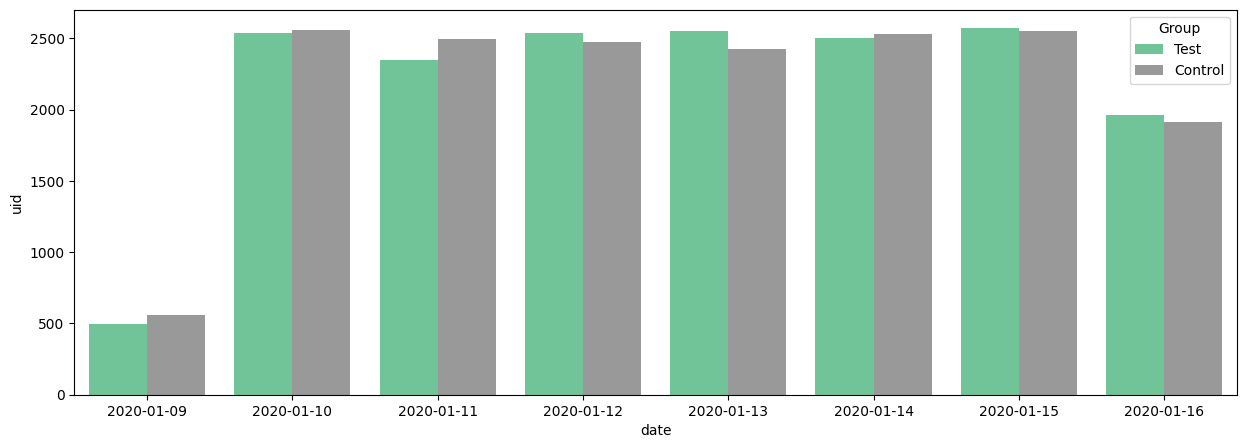

In [167]:
df_agg = action_first_open_7d.groupby(['date', 'Group'])['uid'].nunique().reset_index()
df_agg['Group'] = df_agg['Group'].replace({'New': 'Test', 'Old': 'Control'})

plt.figure(figsize=(15, 5))
sns.barplot(data=df_agg, x='date', y='uid', hue='Group', palette=['#63d297ff', '#999999ff'])

### Посчитаем конверсии и APPU

In [96]:
exp_payment_7d_control_id = exp_payment_7d[exp_payment_7d['Group'] == 'Old']['uid']
exp_payment_7d_test_id = exp_payment_7d[exp_payment_7d['Group'] == 'New']['uid']
(len(exp_payment_7d_control_id), len(exp_payment_7d_test_id))

(17504, 17508)

In [97]:
# Пользователи с подпиской
exp_payment_7d_control_subs = pays[(pays['Payment'] == 400) & (pays['uid'].isin(exp_payment_7d_control_id))]['uid']
exp_payment_7d_test_subs = pays[(pays['Payment'] == 160) & (pays['uid'].isin(exp_payment_7d_test_id))]['uid']

In [98]:
# Доля пользователей с подпиской в контрольной группе
sub_part_control = (pays[(pays['Payment'] == 400) & (pays['uid'].isin(exp_payment_7d_control_id))]['uid'].nunique()
/ exp_payment_7d_control_id.count())
sub_part_control

0.1983546617915905

In [99]:
# Доля пользователей с подпиской в тестовой группе
sub_part_test = (pays[(pays['Payment'] == 160) & (pays['uid'].isin(exp_payment_7d_test_id))]['uid'].nunique()
/ exp_payment_7d_test_id.count())
sub_part_test

0.5

In [100]:
# Доля пользователей с подпиской, сделавшие разовую подписку
purchases_in_subs_part_control = (pays[(pays['Payment'] == 200) & (pays['uid'].isin(exp_payment_7d_control_subs))]['uid'].count()
/ exp_payment_7d_control_id.count())
purchases_in_subs_part_control

0.07386882998171847

In [101]:
# Доля пользователей с подпиской, сделавшие разовую подписку
purchases_in_subs_part_test = (pays[(pays['Payment'] == 200) & (pays['uid'].isin(exp_payment_7d_test_subs))]['uid'].count()
/ exp_payment_7d_test_id.count())
purchases_in_subs_part_test

0.18602924377427463

In [105]:
# Доля пользователей без подписки, сделавшие разовую подписку, без учета пользователей с подпиской
purchases_in_notsubs_part_control = (pays[(pays['Payment'] == 200)
                                      & (~pays['uid'].isin(exp_payment_7d_control_subs))
                                      & (pays['uid'].isin(exp_payment_7d_control_id))]['uid'].count()
/ exp_payment_7d_control_id.count())
purchases_in_notsubs_part_control

0.2970178244972578

In [106]:
# Доля пользователей без подписки, сделавшие разовую подписку, без учета пользователей с подпиской
purchases_in_notsubs_part_test = (pays[(pays['Payment'] == 200)
                                  & (~pays['uid'].isin(exp_payment_7d_test_subs))
                                  & (pays['uid'].isin(exp_payment_7d_test_id))]['uid'].count()
/ exp_payment_7d_test_id.count())
purchases_in_notsubs_part_test

0.18574366004112405

In [107]:
# Доля пользователей сделавшие разовую подписку
purchases_part_control = purchases_in_subs_part_control + purchases_in_notsubs_part_control
purchases_part_control

0.37088665447897623

In [108]:
# Доля пользователей сделавшие разовую подписку
purchases_part_test = purchases_in_subs_part_test + purchases_in_notsubs_part_test
purchases_part_test

0.3717729038153987

In [116]:
# Рассчитаем ARPU control
arpu_control = pays[pays['uid'].isin(exp_payment_7d_control_id)]['Payment'].sum() / exp_payment_7d_control_id.count()
arpu_control

153.51919561243145

In [117]:
# Рассчитаем ARPU test
arpu_test = pays[pays['uid'].isin(exp_payment_7d_test_id)]['Payment'].sum() / exp_payment_7d_test_id.count()
arpu_test

154.35458076307972

In [125]:
print(f'ARPU увеличилось на {(100 * (arpu_test / arpu_control - 1)):.2f}%')

ARPU увеличилось на 0.54%


In [174]:
print(f'Доля пользователей с подпиской увеличилась в {(sub_part_test / sub_part_control):.2f}')

Доля пользователей с подпиской увеличилась в 2.52


In [176]:
print(f'Доля пользователей с подпиской, сделавшие разовую подписку увеличилась в {(purchases_in_subs_part_test / purchases_in_subs_part_control):.2f}')

Доля пользователей с подпиской, сделавшие разовую подписку увеличилась в 2.52


In [184]:
print(f'Доля пользователей без подписки, сделавшие разовую подписку уменьшилась в {(purchases_in_notsubs_part_test / purchases_in_notsubs_part_control)*100:.2f}')

Доля пользователей без подписки, сделавшие разовую подписку уменьшилась в 62.54


In [196]:
print(f'CR в разовую покупку увеличился на {(round((purchases_part_test - purchases_part_control) * 100, 2))}%')

CR в разовую покупку увеличился на 0.09%


## Посчитаем статистику

In [146]:
exp_payment_7d_pays = pays[pays['uid'].isin(exp_payment_7d['uid'])].groupby('uid', as_index=False)['Payment'].sum()
exp_payment_7d_pays = exp_payment_7d.merge(exp_payment_7d_pays, how='left', on='uid').fillna(0)

In [279]:
# ARPU с доверительным интервалом в каждой группе

In [283]:
# КОНТРОЛЬ
arpu_control = exp_payment_7d_pays[exp_payment_7d_pays['Group'] == 'Old']['Payment'].mean()
arpu_control

153.51919561243145

In [284]:
se_arpu_control = stats.sem(exp_payment_7d_pays[exp_payment_7d_pays['Group'] == 'Old']['Payment'])

In [285]:
stats.t.interval(0.95,
                 df=sum(exp_payment_7d['Group'] == 'Old') - 1,
                 scale=se_arpu_control,
                 loc=arpu_control)

(150.754448092468, 156.28394313239488)

In [286]:
# ТЕСТ
arpu_test = exp_payment_7d_pays[exp_payment_7d_pays['Group'] == 'New']['Payment'].mean()
arpu_test

154.35458076307972

In [287]:
se_arpu_test = stats.sem(exp_payment_7d_pays[exp_payment_7d_pays['Group'] == 'New']['Payment'])

In [296]:
stats.t.interval(0.95,
                 df=sum(exp_payment_7d['Group'] == 'New') - 1,
                 scale=se_arpu_test,
                 loc=arpu_control)

(151.6599681019078, 155.3784231229551)

In [290]:
# CR в разовую покупку с доверительным интервалом в каждой группе

In [291]:
# КОНТРОЛЬ
se_cr_control = np.sqrt(purchases_part_control * (1 - purchases_part_control) / sum(exp_payment_7d['Group'] == 'Old'))

In [292]:
ci_cr_control =  stats.t.interval(0.95,
                                  df=sum(exp_payment_7d['Group'] == 'Old') - 1,
                                  scale=se_cr_control,
                                  loc=purchases_part_control)
ci_cr_control

(0.36373025584330065, 0.3780430531146518)

In [275]:
(purchases_part_control - ci_cr_control[0]) * 100

0.7156398635675576

In [293]:
# ТЕСТ
se_cr_test = np.sqrt(purchases_part_test * (1 - purchases_part_test) / sum(exp_payment_7d['Group'] == 'New'))

In [294]:
ci_cr_test = stats.t.interval(0.95,
                              df=sum(exp_payment_7d['Group'] == 'New') - 1,
                              scale=se_cr_test,
                              loc=purchases_part_test)
ci_cr_test

(0.3646138265882914, 0.37893198104250597)

In [295]:
(purchases_part_test - ci_cr_test[0]) * 100

0.7159077227107291

### ARPU

In [153]:
t_stat, p_value = ttest_ind(exp_payment_7d_pays[exp_payment_7d_pays['Group'] == 'Old']['Payment'],
                            exp_payment_7d_pays[exp_payment_7d_pays['Group'] == 'New']['Payment'])
print(f"T-statistic: {t_stat}, P-value: {p_value:.4f}")

T-statistic: -0.49148608037619507, P-value: 0.6231


### CR в разовую покупку

In [155]:
table = [
    [purchases_part_control * len(exp_payment_7d_control_id),
     (1 - purchases_part_control) * len(exp_payment_7d_control_id)],
    [purchases_part_test * len(exp_payment_7d_test_id),
     (1 - purchases_part_test) * len(exp_payment_7d_test_id)]
]

chi2, p_value, dof, expected = chi2_contingency(table)

print(f"Chi-statistic: {chi2}, P-value: {p_val:.4f}")

Chi-statistic: 0.025775990629922856, P-value: 0.4454
